In [1]:
import pandas as pd
import os
data_path = "records"
data_name = os.listdir(data_path)
print(data_name)

['records-for-2011.csv', 'records-for-2012.csv', 'records-for-2013.csv', 'records-for-2014.csv', 'records-for-2015.csv', 'records-for-2016.csv', 'socrata_metadata_records-for-2011.json', 'socrata_metadata_records-for-2012.json', 'socrata_metadata_records-for-2013.json', 'socrata_metadata_records-for-2014.json', 'socrata_metadata_records-for-2015.json', 'socrata_metadata_records-for-2016.json']


# 数据集：Oakland Crime Statistics 2011 to 2016

# 1 数据可视化和摘要

## 数据清洗

In [2]:
data_fullname=[os.path.join(data_path,data) for data in data_name] # 将路径与文件名拼接，形成完整的文件名称
print(data_fullname)

['records\\records-for-2011.csv', 'records\\records-for-2012.csv', 'records\\records-for-2013.csv', 'records\\records-for-2014.csv', 'records\\records-for-2015.csv', 'records\\records-for-2016.csv', 'records\\socrata_metadata_records-for-2011.json', 'records\\socrata_metadata_records-for-2012.json', 'records\\socrata_metadata_records-for-2013.json', 'records\\socrata_metadata_records-for-2014.json', 'records\\socrata_metadata_records-for-2015.json', 'records\\socrata_metadata_records-for-2016.json']


In [3]:
t = [pd.DataFrame()]*6 # 创建一个包含6个空DataFrame的列表
for i in range(6):
    t[i] = pd.read_csv(data_fullname[i])
    print(i,"  ",t[i].columns)

0    Index(['Agency', 'Create Time', 'Location', 'Area Id', 'Beat', 'Priority',
       'Incident Type Id', 'Incident Type Description', 'Event Number',
       'Closed Time'],
      dtype='object')
1    Index(['Agency', 'Create Time', 'Area Id', 'Beat', 'Priority',
       'Incident Type Id', 'Incident Type Description', 'Event Number',
       'Closed Time', 'Location 1'],
      dtype='object')
2    Index(['Agency', 'Create Time', 'Location ', 'Area Id', 'Beat', 'Priority',
       'Incident Type Id', 'Incident Type Description', 'Event Number',
       'Closed Time'],
      dtype='object')
3    Index(['Agency', 'Create Time', 'Area Id', 'Beat', 'Priority',
       'Incident Type Id', 'Incident Type Description', 'Event Number',
       'Closed Time', 'Location 1'],
      dtype='object')
4    Index(['Agency', 'Create Time', 'Location', 'Area Id', 'Beat', 'Priority',
       'Incident Type Id', 'Incident Type Description', 'Event Number',
       'Closed Time'],
      dtype='object')
5    Index

将6个csv读入t中,查看他们的列名。

In [4]:
a=set()
b=set(t[0].columns)
for i in t:
    a = a.union(set(i.columns))
    b = b.intersection(set(i.columns))
a-b

{'Location', 'Location ', 'Location 1'}

发现他们的列名不统一，有Location、Location 、Location 1，所以需要对其进行重命名，统一列名为Location。

In [5]:
t[3]["Location 1"]

0         {'human_address': '{"address":"LINDEN ST","cit...
1         {'human_address': '{"address":"AV&amp;INTERNAT...
2         {'human_address': '{"address":"AV&amp;MACARTHU...
3         {'human_address': '{"address":"MACARTHUR BLVD"...
4         {'human_address': '{"address":"AV&amp;DOWLING ...
5         {'human_address': '{"address":"AV&amp;INTERNAT...
6         {'human_address': '{"address":"AV&amp;PIPPIN S...
7         {'human_address': '{"address":"E 16TH ST","cit...
8         {'human_address': '{"address":"ST&amp;WILLOW S...
9         {'human_address': '{"address":"86TH AV","city"...
10        {'human_address': '{"address":"AV&amp;MACARTHU...
11        {'human_address': '{"address":"MARTIN LUTHER K...
12        {'human_address': '{"address":"AV&amp;INTERNAT...
13        {'human_address': '{"address":"MACARTHUR BLVD"...
14        {'human_address': '{"address":"AV&amp;ROYAL AN...
15        {'human_address': '{"address":"59TH ST","city"...
16        {'human_address': '{"address":

In [6]:
import json
test = {"index1":{"columns1":"data1"}}
json.dumps(test)

'{"index1": {"columns1": "data1"}}'

可以看出"Location 1"的数据不符合json字典格式的，需要单独进行转换

In [7]:
import re
def Location1Convert(data):
    return re.findall('"address":"(.*?)"',data)[0] # 使用findall将adress:"xxx"中内容匹配出来并返回
for i in range(6):
    if "Location 1" in t[i].columns:
        t[i]["Location 1"]=t[i]["Location 1"].apply(Location1Convert)


In [8]:
t[3]["Location 1"].head()

0                    LINDEN ST
1    AV&amp;INTERNATIONAL BLVD
2        AV&amp;MACARTHUR BLVD
3               MACARTHUR BLVD
4            AV&amp;DOWLING ST
Name: Location 1, dtype: object

可以看到Location 1 中的数据已经被转换为字符串了，接下来将"Location 1"、"Location "，统一命名为"Location"

In [9]:
for i in range(6):
    t[i].rename({"Location 1": "Location", "Location ": "Location"}, axis='columns', inplace=True)
    print(t[i].columns)

Index(['Agency', 'Create Time', 'Location', 'Area Id', 'Beat', 'Priority',
       'Incident Type Id', 'Incident Type Description', 'Event Number',
       'Closed Time'],
      dtype='object')
Index(['Agency', 'Create Time', 'Area Id', 'Beat', 'Priority',
       'Incident Type Id', 'Incident Type Description', 'Event Number',
       'Closed Time', 'Location'],
      dtype='object')
Index(['Agency', 'Create Time', 'Location', 'Area Id', 'Beat', 'Priority',
       'Incident Type Id', 'Incident Type Description', 'Event Number',
       'Closed Time'],
      dtype='object')
Index(['Agency', 'Create Time', 'Area Id', 'Beat', 'Priority',
       'Incident Type Id', 'Incident Type Description', 'Event Number',
       'Closed Time', 'Location'],
      dtype='object')
Index(['Agency', 'Create Time', 'Location', 'Area Id', 'Beat', 'Priority',
       'Incident Type Id', 'Incident Type Description', 'Event Number',
       'Closed Time'],
      dtype='object')
Index(['Agency', 'Create Time', 'Locatio

In [10]:
import numpy as np
data = pd.concat(t, ignore_index=True, sort=False) # 将6个数据集进行合并
def cleanLocation(data):
    if data.strip(): # 有可能Location是空格或者换行，也按照NaN处理
        return data.strip()
    else:
        return np.nan
data["Location"] = data["Location"].apply(cleanLocation) # 对Location部分进行处理，标记NaN、去除首尾空格和空行


以上完成了对数据集的清洗

## 数据摘要

### 标称属性


In [11]:
Nominal_Attributes = ["Area Id","Beat","Priority","Incident Type Id","Incident Type Description","Event Number","Location"]
print("Agency均为op，not interesting，所以标称属性为以下几种")
print(Nominal_Attributes)

Agency均为op，not interesting，所以标称属性为以下几种
['Area Id', 'Beat', 'Priority', 'Incident Type Id', 'Incident Type Description', 'Event Number', 'Location']


In [12]:
for attribute in Nominal_Attributes:
    print(data[attribute].value_counts().head(),"\n")

1.0    290452
2.0    236700
P3     129054
P1     114560
P2      53033
Name: Area Id, dtype: int64 

04X    43626
08X    38097
30Y    30880
26Y    30377
30X    29881
Name: Beat, dtype: int64 

2.0    814818
1.0    231542
0.0        24
Name: Priority, dtype: int64 

933R     98497
SECCK    70965
415      66720
911H     54935
10851    47958
Name: Incident Type Id, dtype: int64 

ALARM-RINGER            98497
SECURITY CHECK          70965
911 HANG-UP             54935
STOLEN VEHICLE          47958
DISTURBING THE PEACE    38257
Name: Incident Type Description, dtype: int64 

LOP130204000365    1
LOP120729000843    1
LOP120301001046    1
LOP151004000313    1
LOP160121000792    1
Name: Event Number, dtype: int64 

INTERNATIONAL BLVD       20735
MACARTHUR BLVD           17196
BROADWAY                 12214
AV&INTERNATIONAL BLVD    11407
FOOTHILL BLVD             9669
Name: Location, dtype: int64 



### 数值属性

无

## 数据缺失的处理
### 缺失值分析

In [13]:
data.isna().sum() # 查看各属性缺失值个数

Agency                            4
Create Time                       4
Location                        300
Area Id                      182365
Beat                           5805
Priority                          4
Incident Type Id                  4
Incident Type Description       392
Event Number                      4
Closed Time                      29
dtype: int64

In [170]:
def get_naDataFrame(na_attribute): # 获取是指定属性全部是na值的数据帧
    return data[data[na_attribute].isna()]
i=0
for attribute1 in Nominal_Attributes:
    print()
    i+=1
    j=0
    for attribute2 in Nominal_Attributes:
        if attribute1 != attribute2:
            j+=1
            print("{0}_{1} {2}_Na <==> {3}".format(i,j,attribute1,attribute2))
            print(get_naDataFrame(attribute1)[attribute2].value_counts(normalize=True).head(),"\n")
    


1_1 Area Id_Na <==> Beat
04X    0.041400
08X    0.035470
30X    0.029983
30Y    0.029579
23X    0.029473
Name: Beat, dtype: float64 

1_2 Area Id_Na <==> Priority
2.0    0.776827
1.0    0.223173
Name: Priority, dtype: float64 

1_3 Area Id_Na <==> Incident Type Id
933R     0.092854
SECCK    0.074292
415      0.062475
911H     0.050619
10851    0.046265
Name: Incident Type Id, dtype: float64 

1_4 Area Id_Na <==> Incident Type Description
ALARM-RINGER      0.092928
SECURITY CHECK    0.074351
911 HANG-UP       0.050660
STOLEN VEHICLE    0.046302
MENTALLY ILL      0.036473
Name: Incident Type Description, dtype: float64 

1_5 Area Id_Na <==> Event Number
LOP140627000528    0.000005
LOP141021001022    0.000005
LOP140621000444    0.000005
LOP111026000591    0.000005
LOP141011000373    0.000005
Name: Event Number, dtype: float64 

1_6 Area Id_Na <==> Location
INTERNATIONAL BLVD           0.019281
AV&amp;INTERNATIONAL BLVD    0.016846
MACARTHUR BLVD               0.014432
BROADWAY           

### 缺失值处理

1. 将缺失部分剔除 

In [172]:
data_dropna = data.dropna() # 将缺失部分剔除
data_dropna.isna().sum() 

Agency                       0
Create Time                  0
Location                     0
Area Id                      0
Beat                         0
Priority                     0
Incident Type Id             0
Incident Type Description    0
Event Number                 0
Closed Time                  0
dtype: int64

2. 用最高频率值来填补缺失值

In [186]:
data_frequency = data.copy()
for attribute in data.columns:
    filler = data[attribute].value_counts().index[0] # 对每个属性，找到分类排名第一的索引，作为filler
    data_frequency[attribute].fillna(filler,inplace=True)
    print(attribute,"'s na filled with ",filler)

data_frequency.isna().sum()

Agency 's na filled with  OP
Create Time 's na filled with  2013-01-29T09:16:31.000
Location 's na filled with  INTERNATIONAL BLVD
Area Id 's na filled with  1.0
Beat 's na filled with  04X
Priority 's na filled with  2.0
Incident Type Id 's na filled with  933R
Incident Type Description 's na filled with  ALARM-RINGER
Event Number 's na filled with  LOP140627000528
Closed Time 's na filled with  2013-09-01T17:23:50.000


Agency                       0
Create Time                  0
Location                     0
Area Id                      0
Beat                         0
Priority                     0
Incident Type Id             0
Incident Type Description    0
Event Number                 0
Closed Time                  0
dtype: int64

3. 通过属性的相关关系来填补缺失值

以"Area Id"为例：
结合之前的结果，其缺失与Priority的相关性很高

决策树不会--，这部分跳过

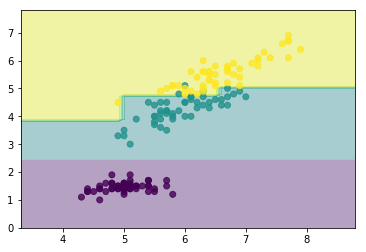

In [200]:

from itertools import product

import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier


# 仍然使用自带的iris数据
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# 训练模型，限制树的最大深度4
clf = DecisionTreeClassifier(max_depth=4)
#拟合模型
clf.fit(X, y)


# 画图
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.show()

### 可视化地对比新旧数据集
仅以"Area Id"属性为例

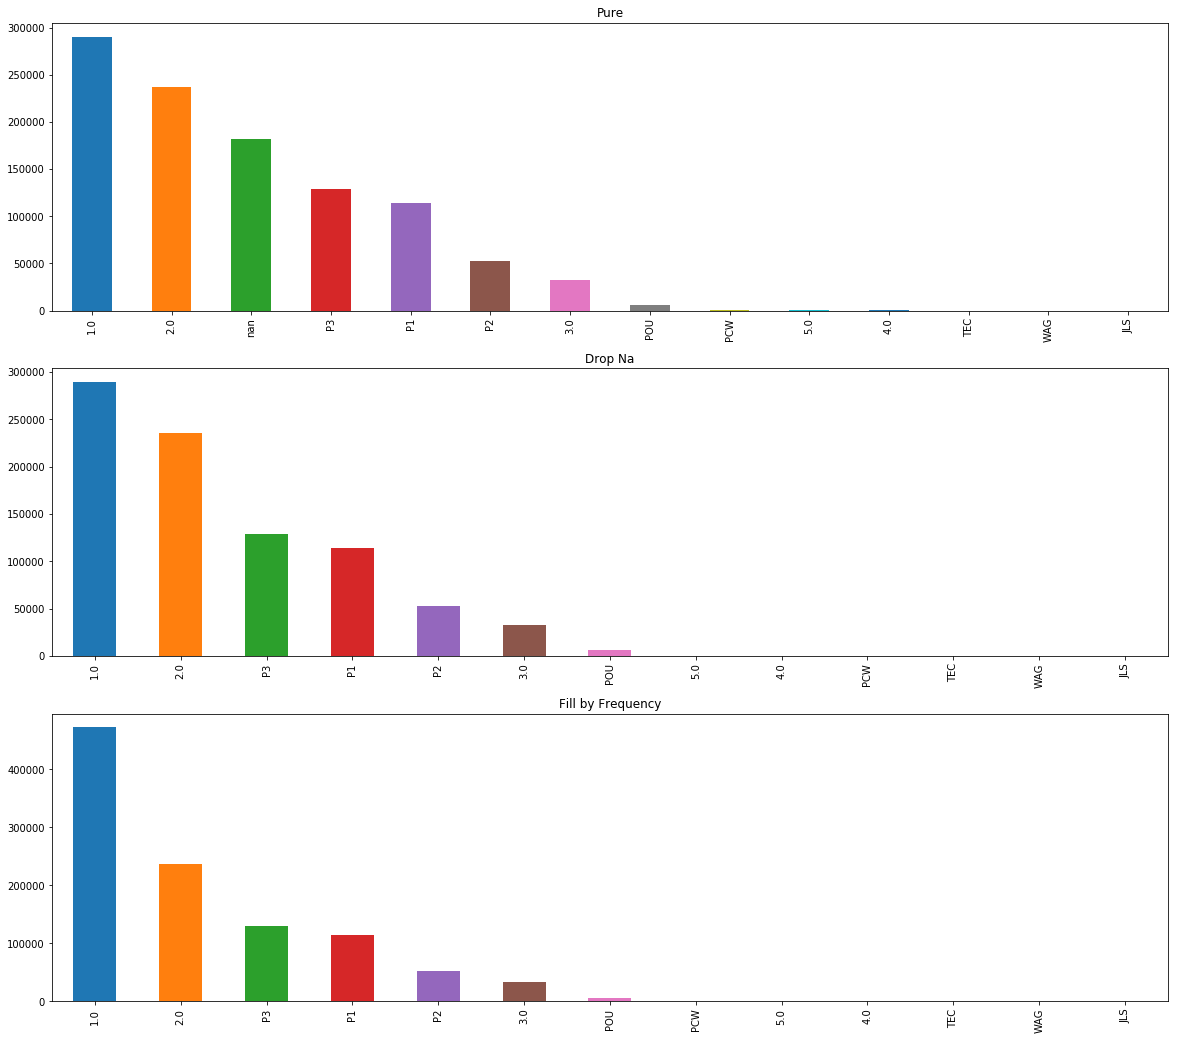

In [214]:
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,18)) # 建立一个20*18的画布
ax1 = fig.add_subplot(3,1,1)      
data["Area Id"].value_counts(dropna=False).plot(kind='bar', title="Pure") # 注意，这里需要加上 dropna=False 否则value_counts默认是不会算上na值的

ax2 = fig.add_subplot(3,1,2)      
data_dropna["Area Id"].value_counts().plot(kind='bar', title="Drop Na")

ax3 = fig.add_subplot(3,1,3)      
data_frequency["Area Id"].value_counts().plot(kind='bar', title="Fill by Frequency")